# Introdução

## Importação de Bibliotecas Necessárias

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm, probplot, pearsonr, power_divergence

import warnings

warnings.filterwarnings("ignore")

## Declaração da Função do Método de Sturges 

In [12]:
def sturges(dados_coluna):
    return int(1 + 3.3 * np.log10(len(dados_coluna)))

## Carregamento das Bases de Dados

In [13]:
dados_chromecast = pd.read_csv('dataset_chromecast.csv')
dados_smartTv = pd.read_csv('dataset_smart-tv.csv')

## Familiarizando-se com as Tabelas

### Chromecast

In [14]:
dados_chromecast.head(5)

,device_id,date_hour,bytes_up,bytes_down
0,66161985,2021-09-06 00:01:00,2987.016393,49185.704918
1,66161985,2021-09-06 00:02:00,685.935484,328.258065
2,66161985,2021-09-06 00:03:00,4493.901639,37914.064516
3,66161985,2021-09-06 00:04:00,776.133333,229.200000
4,66161985,2021-09-06 00:05:00,3081.311475,51656.800000


### SmartTV

In [15]:
dados_smartTv.head(5)

,device_id,date_hour,bytes_up,bytes_down
0,77209603,2021-11-22 15:23:00,132932.983607,2.818140e+06
1,77209603,2021-11-22 15:24:00,115770.491803,2.264410e+06
2,77209603,2021-11-22 15:25:00,114030.032787,2.309270e+06
3,77209603,2021-11-22 15:26:00,97170.622951,2.006544e+06
4,77209603,2021-11-22 15:27:00,39569.573770,8.061440e+05


## Tratamento de Dados

### Reescalonamento de Dados para Log 10

#### Chromecast

In [16]:
dados_chromecast["log_bytes_down"] = np.log(1 + dados_chromecast["bytes_down"])
dados_chromecast["log_bytes_up"] = np.log(1 + dados_chromecast["bytes_up"])

#### SmartTV

In [17]:
dados_smartTv["log_bytes_down"] = np.log(1 + dados_smartTv["bytes_down"])
dados_smartTv["log_bytes_up"] = np.log(1 + dados_smartTv["bytes_up"])

### Criando uma Nova Coluna chamada Hour

#### Chromecast

In [18]:
dados_chromecast["hour"] = dados_chromecast["date_hour"].apply(
    lambda x: int(x.split(" ")[1].split(":")[0])
)

#### SmartTV

In [19]:
dados_smartTv["hour"] = dados_smartTv["date_hour"].apply(
    lambda x: int(x.split(" ")[1].split(":")[0])
)

# Estatísticas Gerais

## Histogramas

### Histograma Frequência x Log₁₀(Bytes Up)

#### Chromecast

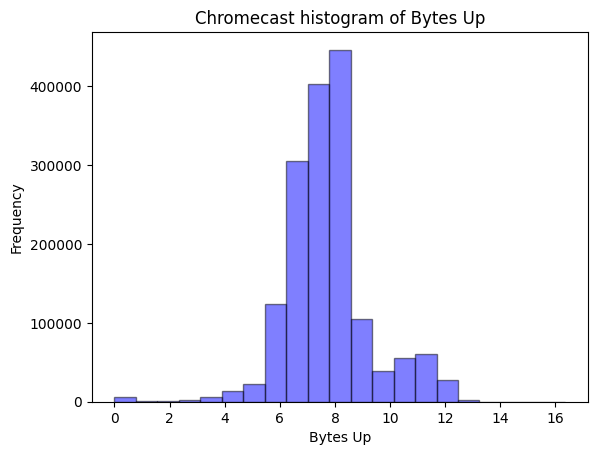

In [20]:
chromecast_hist_bin = int(1 + 3.3 * np.log10(len(dados_chromecast["log_bytes_up"])))
fig = plt.figure()
plt.hist(
    dados_chromecast["log_bytes_up"],
    bins=chromecast_hist_bin,
    color="blue",
    alpha=0.5,
    edgecolor="black",
)
plt.xlabel("Bytes Up")
plt.ylabel("Frequency")
plt.title("Chromecast histogram of Bytes Up")
fig.savefig(
    "chromecast_hist_bytes_up.png", 
    dpi=fig.dpi
)
plt.show()

#### SmartTV

In [ ]:
smart_tv_hist_bin = int(1 + 3.3 * np.log10(len(dados_smartTv["log_bytes_up"])))
fig = plt.figure()
plt.hist(
    dados_smartTv["log_bytes_up"],
    bins=smart_tv_hist_bin,
    color="blue",
    alpha=0.5,
    edgecolor="black",
)
plt.xlabel("Bytes Up")
plt.ylabel("Frequency")
plt.title("Smart TV histogram of Bytes Up")
fig.savefig(
    "smart_tv_hist_bytes_up.png", 
    dpi=fig.dpi
)
plt.show()

### Histograma Frequência x Log₁₀(Bytes down)

#### Chromecast

In [ ]:
chromecast_hist_bin = int(1 + 3.3 * np.log10(len(dados_chromecast["log_bytes_down"])))
fig = plt.figure()
plt.hist(
    dados_chromecast["log_bytes_down"],
    bins=chromecast_hist_bin,
    color="orange",
    alpha=0.5,
    edgecolor="black",
)
plt.xlabel("Bytes Down")
plt.ylabel("Frequency")
plt.title("Chromecast histogram of Bytes Down")
fig.savefig(
    "chromecast_hist_bytes_down.png", 
    dpi=fig.dpi
)
plt.show()

#### SmartTV

In [ ]:
smart_tv_hist_bin = int(1 + 3.3 * np.log10(len(dados_smartTv["log_bytes_down"])))
fig = plt.figure()
plt.hist(
    dados_smartTv["log_bytes_down"],
    bins=smart_tv_hist_bin,
    color="orange",
    alpha=0.5,
    edgecolor="black",
)
plt.xlabel("Bytes Down")
plt.ylabel("Frequency")
plt.title("Smart TV histogram of Bytes Down")
fig.savefig(
    "smart_tv_hist_bytes_down.png", 
    dpi=fig.dpi
)
plt.show()

## Distribuição Empírica

### Log₁₀(Bytes Up)

#### Chromecast

In [ ]:
fig = plt.figure()
plt.plot(
    dados_chromecast["log_bytes_up"].sort_values(),
    np.linspace(0, 1, len(dados_chromecast["log_bytes_up"])),
    color="blue",
    marker=".",
)
plt.xlabel("Bytes Up")
plt.ylabel("Fx(x)")
plt.title("Chromecast Empirical Distribution Function of Bytes Up")
fig.savefig(
    "chromecast_edf_bytes_up.png", 
    dpi=fig.dpi
)
plt.show()

#### SmartTV

In [ ]:
fig = plt.figure()
plt.plot(
    dados_smartTv["log_bytes_up"].sort_values(),
    np.linspace(0, 1, len(dados_smartTv["log_bytes_up"])),
    color="blue",
    marker=".",
)
plt.xlabel("Bytes Up")
plt.ylabel("Fx(x)")
plt.title("Smart TV Empirical Distribution Function of Bytes Up")
fig.savefig(
    "smart_tv_edf_bytes_up.png", 
    dpi=fig.dpi
)
plt.show()

### Log₁₀(Bytes Down)

#### Chromecast

In [ ]:
fig = plt.figure()
plt.plot(
    dados_chromecast["log_bytes_down"].sort_values(),
    np.linspace(0, 1, len(dados_chromecast["log_bytes_down"])),
    color="orange",
    marker=".",
)
plt.xlabel("Bytes Down")
plt.ylabel("Fx(x)")
plt.title("Chromecast Empirical Distribution Function of Bytes Down")
fig.savefig(
    "chromecast_edf_bytes_down.png", 
    dpi=fig.dpi
)
plt.show()

#### SmartTV

In [ ]:
fig = plt.figure()
plt.plot(
    dados_smartTv["log_bytes_down"].sort_values(),
    np.linspace(0, 1, len(dados_smartTv["log_bytes_down"])),
    color="orange",
    marker=".",
)
plt.xlabel("Bytes Down")
plt.ylabel("Fx(x)")
plt.title("Smart TV Empirical Distribution Function of Bytes Down")
fig.savefig(
    "smart_tv_edf_bytes_down.png", 
    dpi=fig.dpi
)
plt.show()

## Boxplot

### Log₁₀(Bytes Up) e Log₁₀(Bytes Down)

#### Chromecast

In [ ]:
fig = plt.figure()
plt.boxplot(
    [dados_chromecast["log_bytes_up"], dados_chromecast["log_bytes_down"]],
    labels=["Bytes Up", "Bytes Down"],
    patch_artist=True,
    boxprops=dict(facecolor="green", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("Bytes")
plt.title("Chromecast Boxplot of Bytes Up and Bytes Down")
fig.savefig(
    "chromecast_boxplot_bytes_up_down.png",
    dpi=fig.dpi,
)
plt.show()

#### SmartTV

In [ ]:
fig = plt.figure()
plt.boxplot(
    [dados_smartTv["log_bytes_up"], dados_smartTv["log_bytes_down"]],
    labels=["Bytes Up", "Bytes Down"],
    patch_artist=True,
    boxprops=dict(facecolor="blue", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("Bytes")
plt.title("Smart TV Boxplot of Bytes Up and Bytes Down")
fig.savefig(
    "smart_tv_boxplot_bytes_up_down.png", 
    dpi=fig.dpi
)
plt.show()

## Média, Variância e Desvio Padrão

### Chromecast

In [ ]:
chromecast_bytes_up_down = pd.DataFrame(
    {
        "Bytes Up": [
            dados_chromecast["log_bytes_up"].mean(),
            dados_chromecast["log_bytes_up"].var(),
            dados_chromecast["log_bytes_up"].std(),
        ],
        "Bytes Down": [
            dados_chromecast["log_bytes_down"].mean(),
            dados_chromecast["log_bytes_down"].var(),
            dados_chromecast["log_bytes_down"].std(),
        ],
    },
    index=["Mean", "Variance", "Standard Deviation"],
)

chromecast_bytes_up_down

### SmartTV

In [ ]:
smart_tv_bytes_up_down = pd.DataFrame(
    {
        "Bytes Up": [
            dados_smartTv["log_bytes_up"].mean(),
            dados_smartTv["log_bytes_up"].var(),
            dados_smartTv["log_bytes_up"].std(),
        ],
        "Bytes Down": [
            dados_smartTv["log_bytes_down"].mean(),
            dados_smartTv["log_bytes_down"].var(),
            dados_smartTv["log_bytes_down"].std(),
        ],
    },
    index=["Mean", "Variance", "Standard Deviation"],
)
smart_tv_bytes_up_down

# Estatísticas por Horário

## Boxplot

### Chromecast

In [ ]:
for hour in range(0, 24):
    fig = plt.figure()
    plt.boxplot(
        [
            dados_chromecast[dados_chromecast["hour"] == hour]["log_bytes_up"],
            dados_chromecast[dados_chromecast["hour"] == hour]["log_bytes_down"],
        ],
        labels=["Bytes Up", "Bytes Down"],
        patch_artist=True,
        boxprops=dict(facecolor="blue", color="black"),
        medianprops=dict(color="black"),
        whiskerprops=dict(color="black"),
        capprops=dict(color="black"),
    )
    plt.ylabel("Bytes")
    plt.title("Chromecast Boxplot of Bytes Up and Bytes Down for Hour " + str(hour))
    fig.savefig(
        f"chromecast_boxplot_bytes_up_down_hour_{hour}.png",
        dpi=fig.dpi,
    )
    plt.show()

### SmartTV

In [ ]:
for hour in range(0, 24):
    fig = plt.figure()
    plt.boxplot(
        [
            dados_smartTv[dados_smartTv["hour"] == hour]["log_bytes_up"],
            dados_smartTv[dados_smartTv["hour"] == hour]["log_bytes_down"],
        ],
        labels=["Bytes Up", "Bytes Down"],
        patch_artist=True,
        boxprops=dict(facecolor="orange", color="black"),
        medianprops=dict(color="black"),
        whiskerprops=dict(color="black"),
        capprops=dict(color="black"),
    )
    plt.ylabel("Bytes")
    plt.title("Smart TV Boxplot of Bytes Up and Bytes Down for Hour " + str(hour))
    fig.savefig(
        f"smart_tv_boxplot_bytes_up_down_hour_{hour}.png",
        dpi=fig.dpi,
    )
    plt.show()

## Média, Variância e Desvio Padrão

### Chromecast

In [ ]:
fig = plt.figure()
plt.plot(dados_chromecast.groupby("hour")["log_bytes_up"].mean(), color="red", marker=".")
plt.plot(dados_chromecast.groupby("hour")["log_bytes_up"].var(), color="green", marker=".")
plt.plot(dados_chromecast.groupby("hour")["log_bytes_up"].std(), color="blue", marker=".")
plt.xlabel("Hour")
plt.ylabel("Bytes")
plt.legend(["Mean", "Variance", "Standard Deviation"])
plt.title("Chromecast Bytes Up Mean, Variance and Standard Deviation by Hour")
fig.savefig(
    "chromecast_line_bytes_up_mean_var_std_hour.png",

    dpi=fig.dpi,
)
plt.show()

### SmartTV

In [ ]:
fig = plt.figure()
plt.plot(dados_smartTv.groupby("hour")["log_bytes_up"].mean(), color="red", marker=".")
plt.plot(dados_smartTv.groupby("hour")["log_bytes_up"].var(), color="green", marker=".")

plt.plot(dados_smartTv.groupby("hour")["log_bytes_up"].std(), color="blue", marker=".")


plt.xlabel("Hour")
plt.ylabel("Bytes")
plt.legend(["Mean", "Variance", "Standard Deviation"])
plt.title("Smart TV Bytes Up Mean, Variance and Standard Deviation by Hour")
fig.savefig(
    "smart_tv_line_bytes_up_mean_var_std_hour.png",
    dpi=fig.dpi,
)

# Caracterizando os horários com maior valor de tráfego

## Filtragem dos Dados Necessários

### Chromecast

In [42]:
hour_of_max_median_up_chromecast = dados_chromecast.groupby("hour")["bytes_up"].median().idxmax()
hour_of_max_mean_up_chromecast = dados_chromecast.groupby("hour")["bytes_up"].mean().idxmax()
hour_of_max_median_down_chromecast = dados_chromecast.groupby("hour")["bytes_down"].median().idxmax()
hour_of_max_mean_down_chromecast = dados_chromecast.groupby("hour")["bytes_down"].mean().idxmax()

In [45]:
df_chromecast_hourly_max = pd.DataFrame(
    {
        "Hour of Max Median": [
            hour_of_max_median_up_chromecast,
            hour_of_max_median_down_chromecast,
        ],
        "Hour of Max Mean": [hour_of_max_mean_up_chromecast, hour_of_max_mean_down_chromecast],
    },
    index=["Log₁₀(Uploaded Bytes)", "Log₁₀(Downloaded Bytes)"],
)

In [46]:
df_chromecast_max_median_up = dados_chromecast[
    (dados_chromecast["hour"] == hour_of_max_median_up_chromecast)
][["hour", "bytes_up", "log_bytes_up", "device_id"]]

df_chromecast_max_mean_up = dados_chromecast[
    (dados_chromecast["hour"] == hour_of_max_mean_up_chromecast)
][["hour", "bytes_up", "log_bytes_up", "device_id"]]

df_chromecast_max_median_down = dados_chromecast[
    (dados_chromecast["hour"] == hour_of_max_median_down_chromecast)
][["hour", "bytes_down", "log_bytes_down", "device_id"]]

df_chromecast_max_mean_down = dados_chromecast[
    (dados_chromecast["hour"] == hour_of_max_mean_down_chromecast)
][["hour", "bytes_down", "log_bytes_down", "device_id"]]

### SmartTV

In [40]:
hour_of_max_median_up_smart_tv = dados_smartTv.groupby("hour")["bytes_up"].median().idxmax()
hour_of_max_mean_up_smart_tv = dados_smartTv.groupby("hour")["bytes_up"].mean().idxmax()
hour_of_max_median_down_smart_tv = dados_smartTv.groupby("hour")["bytes_down"].median().idxmax()
hour_of_max_mean_down_smart_tv = dados_smartTv.groupby("hour")["bytes_down"].mean().idxmax()

In [ ]:
df_smart_tv_hourly_max = pd.DataFrame(
    {
        "Hour of Max Median": [
            hour_of_max_median_up_smart_tv,
            hour_of_max_median_down_smart_tv,
        ],
        "Hour of Max Mean": [hour_of_max_mean_up_smart_tv, hour_of_max_mean_down_smart_tv],
    },
    index=["Log₁₀(Uploaded Bytes)", "Log₁₀(Downloaded Bytes)"],
)

In [ ]:
df_smart_tv_max_median_up = df_smart_tv[
    df_smart_tv["hour"] == hour_of_max_median_up_smart_tv
][["device_id", "hour", "bytes_up", "log_bytes_up"]]

df_smart_tv_max_median_down = df_smart_tv[
    df_smart_tv["hour"] == hour_of_max_median_down_smart_tv
][["device_id", "hour", "bytes_down", "log_bytes_down"]]

df_smart_tv_max_mean_up = df_smart_tv[
    df_smart_tv["hour"] == hour_of_max_mean_up_smart_tv
][["device_id", "hour", "bytes_up", "log_bytes_up"]]

df_smart_tv_max_mean_down = df_smart_tv[
    df_smart_tv["hour"] == hour_of_max_mean_down_smart_tv
][["device_id", "hour", "bytes_down", "log_bytes_down"]]

## Histograma

### Chromecast

In [ ]:
for df, column, name, figure_name in [
    (df_chromecast_max_median_up, "log_bytes_up", "ChromeCast Max Median Log₁₀(Uploaded Bytes)", "chromecast_max_median_up"),
    (df_chromecast_max_median_down, "log_bytes_down", "ChromeCast Max Median Log₁₀(Downloaded Bytes)", "chromecast_max_median_down"),
    (df_chromecast_max_mean_up, "log_bytes_up", "ChromeCast Max Mean Log₁₀(Uploaded Bytes)", "chromecast_max_mean_up"),
    (df_chromecast_max_mean_down, "log_bytes_down", "ChromeCast Max Mean Log₁₀(Downloaded Bytes)", "chromecast_max_mean_down"),
]:
    chromecast_hist_bin = calculate_bin(df[column])
    fig = plt.figure()
    plt.hist(
        df[column],
        bins=chromecast_hist_bin,
        color=("blue" if column == "log_bytes_up" else "red"),
        alpha=0.5,
        edgecolor="black",
    )
    plt.xlabel("Log₁₀(Uploaded Bytes)" if column == "log_bytes_up" else "Log₁₀(Downloaded Bytes)")
    plt.ylabel("Frequency")
    plt.title(f"Histogram for {name} (Hour {df['hour'].iloc[0]})")
    fig.savefig(
        f"chromecast_histogram_{figure_name}.png",
        dpi=fig.dpi,
    )

### SmartTV

In [ ]:
for df, column, name, figure_name in [
    (df_smart_tv_max_median_up, "log_bytes_up", "Smart TV Max Median Log₁₀(Uploaded Bytes)", "smart_tv_max_median_up"),
    (df_smart_tv_max_median_down, "log_bytes_down", "Smart TV  Max Median Log₁₀(Downloaded Bytes)", "smart_tv_max_median_down"),
    (df_smart_tv_max_mean_up, "log_bytes_up", "Smart TV  Max Mean Log₁₀(Uploaded Bytes)", "smart_tv_max_mean_up"),
    (df_smart_tv_max_mean_down, "log_bytes_down", "Smart TV  Max Mean Log₁₀(Downloaded Bytes)", "smart_tv_max_mean_down"),
]:
    smart_tv_hist_bin = calculate_bin(df[column])
    fig = plt.figure()
    plt.hist(
        df[column],
        bins=smart_tv_hist_bin,
        color=("blue" if column == "log_bytes_up" else "red"),
        alpha=0.5,
        edgecolor="black",
    )
    plt.xlabel("Log₁₀(Uploaded Bytes)" if column == "log_bytes_up" else "Log₁₀(Downloaded Bytes)")
    plt.ylabel("Frequency")
    plt.title(f"Histogram for {name} (Hour {df['hour'].iloc[0]})")
    fig.savefig(
        f"smart_tv_histogram_{figure_name}.png",
        dpi=fig.dpi,
    )

## MLE

### Gamma

#### Chormecast

In [ ]:
for df, column, name in [
    (df_chromecast_max_median_up, "log_bytes_up", "ChromeCast Max Median Log₁₀(Uploaded Bytes)"),
    (df_chromecast_max_median_down, "log_bytes_down", "ChromeCast Max Median Log₁₀(Downloaded Bytes)"),
    (df_chromecast_max_mean_up, "log_bytes_up", "ChromeCast Max Mean Log₁₀(Uploaded Bytes)"),
    (df_chromecast_max_mean_down, "log_bytes_down", "ChromeCast Max Mean Log₁₀(Downloaded Bytes)"),
]:
    shape, loc, scale = gamma.fit(df[column])
    df_gamma = pd.DataFrame(
        {
            "shape": [shape], 
            "loc": [loc], 
            "scale": [scale]
        }
    )
    print(f"Gamma Distribution for {name} (Hour {df['hour'].iloc[0]})")
    print(df_gamma.to_markdown())
    print()

#### SmartTV

In [ ]:
for df, column, name in [
    (df_smart_tv_max_median_up, "log_bytes_up", "Smart TV Max Median Log₁₀(Uploaded Bytes)"),
    (df_smart_tv_max_median_down, "log_bytes_down", "Smart TV Max Median Log₁₀(Downloaded Bytes)"),
    (df_smart_tv_max_mean_up, "log_bytes_up", "Smart TV Max Mean Log₁₀(Uploaded Bytes)"),
    (df_smart_tv_max_mean_down, "log_bytes_down", "Smart TV Max Mean Log₁₀(Downloaded Bytes)"),
]:
    shape, loc, scale = gamma.fit(df[column])
    df_gamma = pd.DataFrame(
        {
            "shape": [shape], 
            "loc": [loc], 
            "scale": [scale]
        }
    )

### Gaussian

#### Chromecast

In [ ]:
for df, column, name in [
    (df_chromecast_max_median_up, "log_bytes_up", "ChromeCast Max Median Log₁₀(Uploaded Bytes)"),
    (df_chromecast_max_median_down, "log_bytes_down", "ChromeCast Max Median Log₁₀(Downloaded Bytes)"),
    (df_chromecast_max_mean_up, "log_bytes_up", "ChromeCast Max Mean Log₁₀(Uploaded Bytes)"),
    (df_chromecast_max_mean_down, "log_bytes_down", "ChromeCast Max Mean Log₁₀(Downloaded Bytes)"),
]:
    df_mean_median = pd.DataFrame(
        {
            "mean": [df[column].mean()], 
            "median": [df[column].median()]
        }
    )
    print(f"Gaussian Distribution for {name} (Hour {df['hour'].iloc[0]})")
    print(df_mean_median.to_markdown())
    print()

#### SmartTV

In [ ]:
for df, column, name in [
    (df_smart_tv_max_median_up, "log_bytes_up", "Smart TV Max Median Log₁₀(Uploaded Bytes)"),
    (df_smart_tv_max_median_down, "log_bytes_down", "Smart TV Max Median Log₁₀(Downloaded Bytes)"),
    (df_smart_tv_max_mean_up, "log_bytes_up", "Smart TV Max Mean Log₁₀(Uploaded Bytes)"),
    (df_smart_tv_max_mean_down, "log_bytes_down", "Smart TV Max Mean Log₁₀(Downloaded Bytes)"),
]:
    df_mean_median = pd.DataFrame(
        {
            "mean": [df[column].mean()], 
            "median": [df[column].median()]
        }
    )

## Histograma com o MLE

### Chromecast

In [ ]:
for df, column, title, column_name in [
    (df_chromecast_max_median_up, "log_bytes_up", "ChromeCast Max Median Log₁₀(Uploaded Bytes)", "log_bytes_up_max_median"),
    (df_chromecast_max_median_down, "log_bytes_down", "ChromeCast Max Median Log₁₀(Downloaded Bytes)", "log_bytes_down_max_median"),
    (df_chromecast_max_mean_up, "log_bytes_up", "ChromeCast Max Mean Log₁₀(Uploaded Bytes)", "log_bytes_up_max_mean"),
    (df_chromecast_max_mean_down, "log_bytes_down", "ChromeCast Max Mean Log₁₀(Downloaded Bytes)", "log_bytes_down_max_mean"),
]:
    fig = plt.figure()
    chromecast_hist_bin = calculate_bin(df[column])
    plt.hist(
        df[column],
        bins=chromecast_hist_bin,
        color=("blue" if column == "log_bytes_up" else "red"),
        alpha=0.5,
        edgecolor="black",
        label="Histogram",
        density=True,
    )

    x = np.linspace(df[column].min(), df[column].max(), len(df[column]))

    shape, loc, scale = gamma.fit(df[column])
    gamma_distribution = gamma.pdf(x, shape, loc, scale)

    mean, std = norm.fit(df[column])
    gaussian_distribution = norm.pdf(x, mean, std)

    plt.plot(x, gamma_distribution, label="Gamma", color="green")
    plt.plot(x, gaussian_distribution, label="Gaussian", color="orange")
    plt.xlabel("Log₁₀(Uploaded Bytes)" if column == "log_bytes_up" else "Log₁₀(Downloaded Bytes)")
    plt.ylabel("Frequency")
    plt.title(f"Histogram for {title} (Hour {df['hour'].iloc[0]})")
    plt.legend(loc="best")
    fig.savefig(
        f"chromecast_histogram_mle_{column_name}.png",
        dpi=fig.dpi,
    )

### SmartTV

In [ ]:
for df, column, title, column_name in [
    (df_smart_tv_max_median_up, "log_bytes_up", "Smart TV Max Median Log₁₀(Uploaded Bytes)", "log_bytes_up_max_median"),
    (df_smart_tv_max_median_down, "log_bytes_down", "Smart TV Max Median Log₁₀(Downloaded Bytes)", "log_bytes_down_max_median"),
    (df_smart_tv_max_mean_up, "log_bytes_up", "Smart TV Max Mean Log₁₀(Uploaded Bytes)", "log_bytes_up_max_mean"),
    (df_smart_tv_max_mean_down, "log_bytes_down", "Smart TV Max Mean Log₁₀(Downloaded Bytes)", "log_bytes_down_max_mean"),
]:
    fig = plt.figure()
    smart_tv_hist_bin = calculate_bin(df[column])
    plt.hist(
        df[column],
        bins=smart_tv_hist_bin,
        color=("blue" if column == "log_bytes_up" else "red"),
        alpha=0.5,
        edgecolor="black",
        label="Histogram",
        density=True,
    )

    x = np.linspace(df[column].min(), df[column].max(), len(df[column]))

    shape, loc, scale = gamma.fit(df[column])
    gamma_distribution = gamma.pdf(x, shape, loc, scale)

    mean, std = norm.fit(df[column])
    gaussian_distribution = norm.pdf(x, mean, std)

    plt.plot(x, gamma_distribution, label="Gamma", color="green")
    plt.plot(x, gaussian_distribution, label="Gaussian", color="orange")
    plt.xlabel("Log₁₀(Uploaded Bytes)" if column == "log_bytes_up" else "Log₁₀(Downloaded Bytes)")
    plt.ylabel("Frequency")
    plt.title(f"Histogram for {title} (Hour {df['hour'].iloc[0]})")
    plt.legend(loc="best")
    fig.savefig(
        f"smart_tv_histogram_mle_{column_name}.png",
        dpi=fig.dpi,
    )

## Gráfico Probability Plot

### Chromecast

In [ ]:
for df, column, name, figure_name in [
    (df_chromecast_max_median_up, "log_bytes_up", "Smart TV Max Median Log₁₀(Uploaded Bytes)", "chromecast_max_median_up"),
    (df_chromecast_max_median_down, "log_bytes_down", "Smart TV Max Median Log₁₀(Downloaded Bytes)", "chromecast_max_median_down"),
    (df_chromecast_max_mean_up, "log_bytes_up", "Smart TV Max Mean Log₁₀(Uploaded Bytes)", "chromecast_max_mean_up"),
    (df_chromecast_max_mean_down, "log_bytes_down", "Smart TV Max Mean Log₁₀(Downloaded Bytes)", "chromecast_max_mean_down"),
]:

    fig, axes = plt.subplots(1, 2, figsize=(18, 5))

    fig.suptitle(f"Probability Plot for {name} (Hour {df['hour'].iloc[0]})")

    x = df[column]
    probplot(x, dist=gamma, sparams=(shape, loc, scale), plot=axes[0])
    probplot(x, dist=norm, sparams=(df[column].mean(), df[column].std()), plot=axes[1])

    axes[0].set_title(f"Gamma Distribution")
    axes[1].set_title(f"Gaussian Distribution")

    axes[0].set(xlabel="Theoretical Quantiles", ylabel="Ordered Values")
    axes[1].set(xlabel="Theoretical Quantiles", ylabel="Ordered Values")

    fig.savefig(
        f"probability_plot_{figure_name}.png",
        dpi=fig.dpi,
    )
    plt.show()

### SmartTV

In [ ]:
for df, column, name, figure_name in [
    (df_smart_tv_max_median_up, "log_bytes_up", "Smart TV Max Median Log₁₀(Uploaded Bytes)", "smart_tv_max_median_up"),
    (df_smart_tv_max_median_down, "log_bytes_down", "Smart TV Max Median Log₁₀(Downloaded Bytes)", "smart_tv_max_median_down"),
    (df_smart_tv_max_mean_up, "log_bytes_up", "Smart TV Max Mean Log₁₀(Uploaded Bytes)", "smart_tv_max_mean_up"),
    (df_smart_tv_max_mean_down, "log_bytes_down", "Smart TV Max Mean Log₁₀(Downloaded Bytes)", "smart_tv_max_mean_down"),
]:

    fig, axes = plt.subplots(1, 2, figsize=(18, 5))

    fig.suptitle(f"Probability Plot for {name} (Hour {df['hour'].iloc[0]})")

    x = df[column]
    probplot(x, dist=gamma, sparams=(shape, loc, scale), plot=axes[0])
    probplot(x, dist=norm, sparams=(df[column].mean(), df[column].std()), plot=axes[1])

    axes[0].set_title(f"Gamma Distribution")
    axes[1].set_title(f"Gaussian Distribution")

    axes[0].set(xlabel="Theoretical Quantiles", ylabel="Ordered Values")
    axes[1].set(xlabel="Theoretical Quantiles", ylabel="Ordered Values")
    fig.savefig(
        f"probability_plot_{figure_name}.png",
        dpi=fig.dpi,
    )
    plt.show()

# Análise da correlação entre as taxas de upload e download para os horários com o maior valor de tráfego

## Coeficiente de Correlação de Amostragem

In [ ]:
for df1, df2, name in [
    (
        df_smart_tv_max_median_up, 
        df_smart_tv_max_median_down, 
        "Smart TV Max Median Log₁₀(Bytes)"),
    (
        df_smart_tv_max_mean_up, 
        df_smart_tv_max_mean_down, 
        "Smart TV Max Mean Log₁₀(Bytes)"),
    (
        df_chromecast_max_median_up,
        df_chromecast_max_median_down,
        "Chromecast Max Median Log₁₀(Bytes)"
    ),
    (
        df_chromecast_max_mean_up, 
        df_chromecast_max_mean_down, 
        "Chromecast Max Median Log₁₀(Bytes)"),
]:
    if df1.shape[0] != df2.shape[0]:
        if df1.shape[0] > df2.shape[0]:
            df1 = df1.sample(n=df2.shape[0])
        else:
            df2 = df2.sample(n=df1.shape[0])

    pearson_coef, p_value = pearsonr(df1["log_bytes_up"], df2["log_bytes_down"])
    df_coef = pd.DataFrame(
        {
            "pearson_coef": [pearson_coef], 
            "p_value": [p_value], "name": [name]
        }
    )

## Gráfico dos Coeficientes de Correlação de Amostragem

In [ ]:
for df1, df2, title, figure_name in [
    (
        df_smart_tv_max_median_up,
        df_smart_tv_max_median_down,
        "Smart TV Max Median Log₁₀(Uploaded Bytes) and Log₁₀(Downloaded Bytes)",
        "smart_tv_max_median",
    ),
    (
        df_smart_tv_max_mean_up,
        df_smart_tv_max_mean_down,
        "Smart TV Max Mean Log₁₀(Uploaded Bytes) and Log₁₀(Downloaded Bytes)",
        "smart_tv_max_mean",
    ),
    (
        df_chromecast_max_median_up,
        df_chromecast_max_median_down,
        "Chromecast Max Median Log₁₀(Uploaded Bytes) and Log₁₀(Downloaded Bytes)",
        "chromecast_max_median",
    ),
    (
        df_chromecast_max_mean_up,
        df_chromecast_max_mean_down,
        "Chromecast Max Mean Log₁₀(Uploaded Bytes) and Log₁₀(Downloaded Bytes)",
        "chromecast_max_mean",
    ),
]:
    if df1.shape[0] != df2.shape[0]:
        if df1.shape[0] > df2.shape[0]:
            df1 = df1.sample(n=df2.shape[0])
        else:
            df2 = df2.sample(n=df1.shape[0])

    fig = plt.figure()
    plt.scatter(df1["log_bytes_up"], df2["log_bytes_down"])
    plt.xlabel("Log₁₀(Uploaded Bytes)")
    plt.ylabel("Log₁₀(Downloaded Bytes)")
    plt.title(f"Scatter Plot for {title}")

    folder = (
        f"../images/fifth_section/smart_tv"
        if "smart_tv" in figure_name
        else f"../images/fifth_section/chromecast"
    )

    fig.savefig(
        f"{folder}/scatter_plot/scatter_plot_{figure_name}.png",
        dpi=fig.dpi,
    )

    plt.show()

# Comparação dos dados gerados pelos dispositivos SmartTV e Chromecast

## G-teste

In [ ]:
df_g_test = pd.DataFrame(columns=["g_test", "p_value", "name", "column"])

for df1, df2, name, column in [
    (
        df_smart_tv_max_median_up,
        df_chromecast_max_median_up,
        "smart_tv_max_median_up_chromecast_max_median_up",
        "log_bytes_up",
    ),
    (
        df_smart_tv_max_mean_up,
        df_chromecast_max_mean_up,
        "smart_tv_max_mean_up_chromecast_max_mean_up",
        "log_bytes_up",
    ),
    (
        df_smart_tv_max_median_down,
        df_chromecast_max_median_down,
        "smart_tv_max_median_down_chromecast_max_median_down",
        "log_bytes_down",
    ),
    (
        df_smart_tv_max_mean_down,
        df_chromecast_max_mean_down,
        "smart_tv_max_mean_down_chromecast_max_mean_down",
        "log_bytes_down",
    ),
]:
    observed_upload_df1 = df1[column].value_counts()
    observed_upload_df2 = df2[column].value_counts()
    
    if observed_upload_df1.shape[0] != observed_upload_df2.shape[0]:
        if observed_upload_df1.shape[0] > observed_upload_df2.shape[0]:
            observed_upload_df1 = observed_upload_df1.sample(n=observed_upload_df2.shape[0])
        else:
            observed_upload_df2 = observed_upload_df2.sample(n=observed_upload_df1.shape[0])

    observed_upload_df1 = observed_upload_df1 / observed_upload_df1.sum()
    observed_upload_df2 = observed_upload_df2 / observed_upload_df2.sum()
    
    g, p = power_divergence(observed_upload_df1, observed_upload_df2, lambda_='log-likelihood')

    df_g_test = df_g_test.append(
        {
            "g_test": g,
            "p_value": p,
            "name": name,
            "column": column,
        },
        ignore_index=True,
    )

print(df_g_test.to_markdown())